Introduction:
The basis of the project stands on finding the best neighborhood in Pittsburgh in regards to walkability. We split up the definition of walkability into a couple parts: pedestrian safety, sidewalk to street ratio, crosswalk and intersection count, and walk score. We felt that these were the most prominent parts of walking in a neighborhood.

The metric: With my metric, pedestrian safety, I used an arrest dataset. Within this dataset, I am able to filter out arrests involving regular citizens and pedestrians. These people may be involved in crimes resulting from robbery, simple assault, aggravated assault, and endangerment.

South Side Flats             1321
Central Business District    1231
Carrick                       887
Marshall-Shadeland            632
Homewood North                572
                             ... 
Mt. Oliver Boro                 6
Outside State                   6
Central Northside               2
Outside County                  2
Mt. Oliver Neighborhood         1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64
Average of 209 arrests per neighborhood.


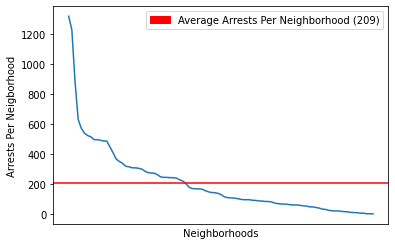

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# turn arrests.csv file to dataframe
arrests = pd.read_csv("arrest.csv")

# all masks that involve pedestrian accidents
robbery_mask = arrests['OFFENSES'].str.contains('robbery', na = False, case = False) 
disorderly_mask = arrests['OFFENSES'].str.contains('Disorderly conduct', na = False, case = False) 
aggravate_mask = arrests['OFFENSES'].str.contains('Aggravated assault', na = False, case = False) 
endanger_mask = arrests['OFFENSES'].str.contains('Recklessy Endangering Another Person', na = False, case = False)
assault_mask = arrests['OFFENSES'].str.contains('Simple assault', na = False, case = False)

# data set with arrests involving pedestrians
pedestrian_accidents = arrests[robbery_mask | disorderly_mask | aggravate_mask | endanger_mask | assault_mask]

# make a line plot with neighborhoods and all arrests
rest = pedestrian_accidents['INCIDENTNEIGHBORHOOD'].value_counts()
arrests_plot = rest.plot(kind="line")
arrests_plot = plt.axhline(209, color='red')
print(rest)

# average arrests per neighborhood
count = 0
all = 0
for x in rest:
    count += 1
    all += x
print("Average of", int(all / count), "arrests per neighborhood.")

# set legend, x-axis, y-axis
patch = mpatches.Patch(color='red', label='Average Arrests Per Neighborhood (209)')
arrests_plot = plt.legend(handles=[patch])
arrests_plot = plt.xticks(labels=[], ticks=[])
arrests_plot = plt.xlabel("Neighborhoods")
arrests_plot = plt.ylabel("Arrests Per Neigborhood")

               neighborhood   age
50        Central Northside  43.0
3             Regent Square  40.0
80            New Homestead  38.5
34               Banksville  37.0
51            Spring Garden  36.0
..                      ...   ...
87             Point Breeze  22.0
65              Perry North  20.0
76             Mount Oliver  13.0
64  Mt. Oliver Neighborhood  13.0
39                      NaN   NaN

[98 rows x 2 columns]


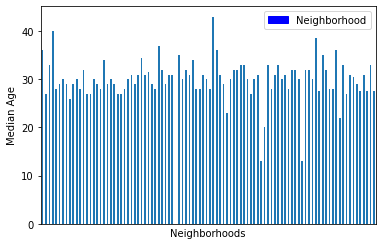

In [3]:
# sort through neighborhoods and find medians of each
neighborhoods = []
med_ages = []
for x in pedestrian_accidents['INCIDENTNEIGHBORHOOD'].unique():
    mask = pedestrian_accidents['INCIDENTNEIGHBORHOOD'] == x
    neighborhood_sort = pedestrian_accidents[mask]
    age = neighborhood_sort["AGE"].median()
    neighborhoods.append(x)
    med_ages.append(age)
    
# create new dataframe with neighborhoods and median age as columns
data1 = {
  "neighborhood": neighborhoods,
  "age": med_ages
}
median_age_df = pd.DataFrame(data1)
in_order_median = median_age_df.sort_values(by=['age'], ascending = False)
print(in_order_median)
median_age_df.plot(kind = "bar")

# set legend, x-axis, y-axis
patch = mpatches.Patch(color='blue', label='Neighborhood')
median_plot = plt.legend(handles=[patch])
median_plot = plt.xticks(labels=[], ticks=[])
median_plot = plt.xlabel("Neighborhoods")
median_plot = plt.ylabel("Median Age")

The Best Neighborhood: 
Based straight off of arrests per neighborhood, we see that small neighborhoods like Mt. Oliver, Outside State, and Central Northside have the least amount of arrests since 2016 as they all have under 6 arrests. In this same analysis we see larger neighborhoods like Squirrel Hill North and Upper Lawrenceville ranking in the top 30% safest neighborhoods in Pittsburgh. 
Similar to this, we look at median age at time of arrest in each neighborhood, and see that Central Northside, Regent Square, and New Homestead have a high median age. This may imply that there will be less accidents and arrests involving citizens in the future.
Final Ranking: 
1. Central Northside
2. Squirrel Hill North
3. Upper Lawrenceville
4. Regent Square
5. New Homestead

Conclusion: Based off pure analytics, the neighborhoods above are the most safe for pedestrains. Based off my opinion, and personal experience, I would have expected and liked to see Shadyside at the top of the list alongside other parts of Squirrel Hill. This contrast between my personal ranking and purely data driven ranking show that there is usually a bias and aspect of human emotion that should be separated from data and analytics.